In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from cyberbullying.data import Data
from cyberbullying.models import MLModel, MLClassifier
from cyberbullying.utils import conf_mx_all
from sklearn.metrics import classification_report

In [3]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [4]:
import joblib

In [5]:
from sklearn import set_config
set_config(display='diagram')

In [24]:
data = Data().get_data(datasets='all')

dict_keys(['toxicity', 'aggression', 'twitter', 'twitter_racism', 'twitter_sexism', 'youtube', 'kaggle'])
['toxicity', 'aggression', 'twitter', 'twitter_racism', 'twitter_sexism', 'youtube', 'kaggle']


In [25]:
data

,text,target
0,This: :One can make an analogy in mathematical...,0.0
1,` :Clarification for you (and Zundark's righ...,0.0
2,Elected or Electoral? JHK,0.0
3,`This is such a fun entry. Devotchka I once...,0.0
4,Please relate the ozone hole to increases in c...,0.0
...,...,...
230464,"""Never really gave it much thought. I just fig...",0.0
230465,"""Nadie se salva de la regla 34 xd""",0.0
230466,"""Question: Are you a boy or a girl?""",0.0
230467,"""Leave your email or phone number and maybe yo...",1.0


In [18]:
from cyberbullying.utils import clean_text

In [26]:
data['type'] = data['text'].map(lambda text: type(text))

In [27]:
data['type'].value_counts()

<class 'str'>    230469
Name: type, dtype: int64

In [28]:
data['text'][1]

"`  :Clarification for you  (and Zundark's right, i should have checked the Wikipedia bugs page first).   This is a ``bug`` in the code that makes wikipedia work  it just means that there is a line of code that may have an error as small as an extra space. It's analogous (in a VERY simplified way) to trying to make something bold in HTML and forgetting to put the  at the end, so you'd see something like this:  words in bold  Instead of this:  words in bold   It's not like a virus, that is code somebody deliberately wrote in order to infect your computer and damage files, so it won't ``go around.`` JHK   `"

In [29]:
data['text'][0].count(' ')

116

In [30]:
len(data['text'][0].split())

109

In [31]:
clean_text(data['text'][1])

'clarification zundark right checked wikipedia bugs page first bug code makes wikipedia work means line code may error small extra space analogous simplified way trying make something bold html forgetting put end see something like words bold instead words bold like virus code somebody deliberately wrote order infect computer damage files go around jhk'

In [32]:
percentage_used = 1
data = data.sample(frac=percentage_used, random_state=0)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(data[['text']], data['target'], test_size=0.3, random_state=0)

In [34]:
X_train.head()

,text
206598,RT @OhSoSoftley: @YesYoureSexist go suck your ...
50685,== Date formats in citations == As per Temp...
213283,That's just sloppy shit on a plate - deconstru...
62596,Basically (I think) that you can either be sup...
146360,` :::All that seems to be known about mortashe...


In [35]:
package_model = MLModel()

In [36]:
package_model.vectorizer

TfidfVectorizer(min_df=3)

In [37]:
package_model.model

LinearSVC(C=1, class_weight={0: 0.2, 1: 0.8}, dual=False, penalty='l1')

In [38]:
package_model.set_pipeline()

In [39]:
package_model.pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('cleandftransformer',
                                                                   CleanDFTransformer()),
                                                                  ('tfidfvectorizer',
                                                                   TfidfVectorizer(min_df=3))]),
                                                  ['text'])])),
                ('linearsvc',
                 LinearSVC(C=1, class_weight={0: 0.2, 1: 0.8}, dual=False,
                           penalty='l1'))])

In [40]:
from cyberbullying.transformers import CleanDFTransformer

In [41]:
X_train.shape

(161328, 1)

In [48]:
y_train

206598    1.0
50685     0.0
213283    0.0
62596     0.0
146360    0.0
         ... 
121124    0.0
163822    0.0
188620    0.0
16843     0.0
42759     0.0
Name: target, Length: 161328, dtype: float64

In [55]:
package_model.pipeline.fit(X_train, y_train) #deberia ser package_model.train(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('cleandftransformer',
                                                                   CleanDFTransformer()),
                                                                  ('tfidfvectorizer',
                                                                   TfidfVectorizer(min_df=3))]),
                                                  ['text'])])),
                ('linearsvc',
                 LinearSVC(C=1, class_weight={0: 0.2, 1: 0.8}, dual=False,
                           penalty='l1'))])

In [57]:
from cyberbullying.utils import clean_df

In [58]:
y_pred = package_model.predict(X_test)

In [59]:
y_pred

array([1., 0., 1., ..., 0., 0., 0.])

In [60]:
y_pred_proba = package_model.predict_proba(X_test)

In [61]:
y_pred_proba

array([[0.27379802, 0.72620198],
       [0.62450381, 0.37549619],
       [0.36775622, 0.63224378],
       ...,
       [0.56336308, 0.43663692],
       [0.51949682, 0.48050318],
       [0.71762595, 0.28237405]])

In [62]:
y_pred_proba[:,0]

array([0.27379802, 0.62450381, 0.36775622, ..., 0.56336308, 0.51949682,
       0.71762595])

Recall: 0.733
Precision: 0.627
Accuracy: 0.915
F1-score: 0.676


(0.733, 0.627, 0.915, 0.676)

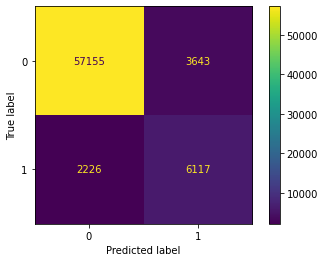

In [63]:
conf_mx_all(y_test, y_pred)

In [64]:
package_model.predict_all(X_test)

,text,proba_0,proba_1,prediction,color
215619,The kick ass part of the dessert was the ass c...,0.273798,0.726202,1.0,orange
221952,"""The Korem foundation will never see another d...",0.624504,0.375496,0.0,None
66532,PPS: by the way stop trying to become an admin...,0.367756,0.632244,1.0,yellow
187427,I've responded to your longer message on my ...,0.755872,0.244128,0.0,None
204350,@seanbonner @metsfan anything that requires a ...,0.659961,0.340039,0.0,None
...,...,...,...,...,...
174893,::*P.S. about disambig pages: it seems that y...,0.776209,0.223791,0.0,None
42249,"If there was disagreement, someone would post ...",0.762451,0.237549,0.0,None
4290,I come from the Faroe Islands. Hoinga Hinga Ho...,0.563363,0.436637,0.0,None
39232,== clio's hair == i always had the picture ...,0.519497,0.480503,0.0,None


In [65]:
pd.DataFrame({'text': X_test['text'], 'target': y_test})[60:80]

,text,target
134352,` :::::I don't think it is pertinent. April 15...,0.0
112531,In that case why not just tweak the wording ...,0.0
78128,` {| style=``border: 1px solid gray; backgrou...,0.0
64467,"==Vandalislisilisilism=== Gee, Thanks!",0.0
165431,"== sorry mate == Sorry mate, but your meaas...",1.0
189993,== U21 templates == Many thanks for creatin...,0.0
11818,For the same reasson that EPROM is called that...,0.0
81183,i dont care anymore i am going to continue u...,0.0
158643,27 - Romili||Seed|||Seed| |December 27,0.0
147542,`This editor is changing Infobox information c...,0.0


In [69]:
texto = '`   Please do not vandalize pages, as you did with this edit to Rhode Island. If you continue to do so, you will be blocked from editing.  \xa0–\xa0 `'

In [70]:
package_model.predict(texto)

array([0.])

In [71]:
package_model.predict_proba(texto)

array([[0.74132437, 0.25867563]])

In [72]:
package_model.predict_simple_text(texto)

,text,proba_0,proba_1,prediction,color
0,`,0.648487,0.351513,0.0,None
1,Please,0.824512,0.175488,0.0,None
2,do,0.648487,0.351513,0.0,None
3,not,0.648487,0.351513,0.0,None
4,vandalize,0.669443,0.330557,0.0,None
5,"pages,",0.677093,0.322907,0.0,None
6,as,0.648487,0.351513,0.0,None
7,you,0.648487,0.351513,0.0,None
8,did,0.648487,0.351513,0.0,None
9,with,0.648487,0.351513,0.0,None


In [ ]:
test_html = package_model.predict_phrase(texto)
test_html

In [ ]:
#package_model.predict_all(' Your a prick. keep your personal thoughts to your self. Jeff is the best driver ever and thats a fact. You musy be an idiot redneck.')

In [ ]:
#package_model.predict_simple_text(' Your a prick. keep your personal thoughts to your self. Jeff is the best driver ever and thats a fact. You musy be an idiot redneck.')

In [ ]:
from cyberbullying.utils import get_trained_model, save_trained_model

In [ ]:
save_trained_model(package_model, 'model_prediction')

In [ ]:
trained_model = get_trained_model('model_prediction')

In [ ]:
trained_model

In [ ]:
trained_model.predict(texto)

In [ ]:
trained_model.predict_proba(texto)

In [ ]:
trained_model.predict_phrase(texto)

# Classification

In [ ]:
data_class = Data().get_data_classification()

In [ ]:
data_class.head()

In [ ]:
data_class.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_class[['text']], data_class['type'], test_size=0.3, random_state=0)

In [ ]:
classifier_model = MLClassifier()

In [ ]:
classifier_model

In [ ]:
classifier_model.vectorizer

In [ ]:
classifier_model.model

In [ ]:
classifier_model.set_pipeline()

In [ ]:
classifier_model.pipeline

In [ ]:
classifier_model.train(X_train, y_train)

In [ ]:
y_pred = classifier_model.predict(X_test)

In [ ]:
y_pred

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
save_trained_model(classifier_model, 'model_classifier')

In [ ]:
trained_classifier_model = get_trained_model('model_classifier')

In [ ]:
trained_classifier_model

In [ ]:
texto

In [ ]:
trained_classifier_model.predict(texto)[0]

In [ ]:
from cyberbullying.utils import predict

In [ ]:
predict(texto)

In [ ]:
predict('hello how are you')